# Going from an interactive visualization running in a notebook file to a containerized interactive visualization running on a web server

<strong>The purpose of this notebook is to provide an example of how one could use an existing interactive visualization in a Jupyter notebook file to create a version that could be hosted on the web. The hope is that the content provides a path where it could be applied to other similar notebooks and open up avenues to create more interactive web content to compliment the notebooks.</strong>

## Prerequisites

In order to work through this example on your local machine make sure you have installed the following programs

* [Python](https://wiki.python.org/moin/BeginnersGuide/Download)
* [pip](https://pip.pypa.io/en/stable/installation/)
* [nbconvert](https://nbconvert.readthedocs.io/en/latest/install.html)
* [Git](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
* [Mamba](https://github.com/conda-forge/miniforge#install)
* [Podman](https://podman.io/docs/installation)

Confirm all are correctly installed by running the following cells, or the cell contents in a terminal window, and the output should be the installed version. If you get a message that the command is not found check your installation and restart your terminal, or this notebook, to make sure changes are loaded correctly. 

In [3]:
!python3 --version

Python 3.10.12


In [4]:
!git --version

git version 2.34.1


In [5]:
!mamba --version

mamba 1.1.0
conda 23.3.1


In [6]:
!podman --version

podman version 3.4.4


## Convert the notebook to run locally as a web server

### Project Pythia examples

[Project Pythia Cookbooks](https://cookbooks.projectpythia.org/) are a great resource for example workflows built with Jupyter Notebooks. Here is a [link to an existing cookbook](https://projectpythia.org/interactive-sentinel-2-cookbook/README.html) authored by [Pritam Das](https://github.com/pritamd47) that contains an interactive visualization to use in this example.  

### Copy the notebook content

In order to get started the notebook files need to be copied in to the working directory. That can be accomplished with git clone as seen in the example below. Running the cell will also add the repository contents to the working directory as well. 

In [1]:
!git clone https://github.com/pritamd47/interactive-sentinel-2.git

Cloning into 'interactive-sentinel-2'...
remote: Enumerating objects: 864, done.
remote: Counting objects: 100% (462/462), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 864 (delta 216), reused 386 (delta 170), pack-reused 402
Receiving objects: 100% (864/864), 9.22 MiB | 2.42 MiB/s, done.
Resolving deltas: 100% (394/394), done.


There is now a directory named interactive-sentinel-2 with the repository contents in the current working directory. The notebook that contains the interactive visualization can be found at [interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.ipynb](interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.ipynb). 

### Convert notebook to Python

The notebook itself can not be run as a web server, but the interactive visualization is built with the Python package [Panel](https://panel.holoviz.org/) which can run a web server. The Jupyter Notebook package contains a CLI tool that can be used to convert notebooks to a Python script. The cell below can be run to do this, or the content can be copied to the command line and run individually.

In [7]:
!jupyter nbconvert --to python interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.ipynb

[NbConvertApp] Converting notebook interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.ipynb to python
[NbConvertApp] Writing 14144 bytes to interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.py


A Python script of the notebook now exists at [interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.py](interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.py)

### Organize web app files

Before changing file content let's create a directory for the web app and copy in the content needed to run everything. The cell below can be run to do this, or the content can be copied to the command line and run individually.

In [8]:
!mkdir interactive-web-app
!cp interactive-sentinel-2/notebooks/data-intake-ms-planetary-computer.py interactive-web-app/app.py
!cp interactive-sentinel-2/environment.yml interactive-web-app/environment.yml

There is now a interactive-web-app directory that contains the Python packages required, in environment.yml, and the notebook that was converted to a Python script which was renamed in the copy to app.py. 

### Install and activate Conda environment

The `interactive-web-app/environment.yml` file contains all the Python packages required to run the application. It can be installed with Mamba by running the following cell or copying the contents to a terminal prompt and running it directly.

In [10]:
!mamba env create -f interactive-web-app/environment.yml

[+] 0.0s
conda-forge/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s[+] 0.1s
conda-forge/linux-64 ━━━━━━━━━━━━╸━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
pkgs/main/linux-64   ━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
pkgs/main/noarch     ╸━━━━━━━━━━━━━━━╸━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
pkgs/r/linux-64      ━━━━━━━━━━━╸━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1spkgs/r/linux-64                                               No change
[+] 0.2s
conda-forge/linux-64 ━━━━━━━━━━━━━━╸━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s
conda-forge/noarch   ━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s
pkgs/main/linux-64   ━━━╸━━━━━━━━━━━━━━━╸━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.2s
pkgs/main/noarch     ━━╸━━━━━━━━━━━━━━━╸━━━━   3.1kB /  ??.?MB @  16.4kB/s  0.2s
pkgs/r/noarch        ━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0spkgs/r/noarch

```{note}
Mamba is used here instead of conda because it is optimized to install the packages faster. It will still take some time to install everything, wait until it is complete to move on.
```

When the installation is complete the following message will be displayed:

```shell
#
# To activate this environment, use
#
#     $ conda activate is2-cookbook-dev
#
# To deactivate an active environment, use
#
#     $ conda deactivate
```

In order to utilize the packages installed it's required to activate the environment with the command shown above first. 

```{note}
Running `conda activate` inside a notebook can be problematic and moving forward running commands in a separate terminal shell will be required. 
```

`conda activate is2-cookbook-dev`

The command line should now look like this:

```shell
(is2-cookbook-dev) ncote@cisl-lagrange:~/Code/nbviz-to-container$
```

```{note}
If you get a message that conda is not initialized for your shell follow the instructions presented for your system and restart the shell before trying again.
```

### Edit app.py & run as web server

In order to run the Python script as a web server only one thing needs to be added, `.servable()`. Open the app.py file and scroll all the way to the bottom. Line 304 contains a single closed parenthesis, `)`. Add `.servable()` after the closed parenthesis and lines 301-304 in the new code will look like this:

```python
pn.Column(
    pn.Row(winter_plot, spring_plot),
    pn.Row(summer_plot, fall_plot)
).servable()
```

Save the file. It can now be tested as a local web server by running the following command in the activated conda environment:

```shell
(is2-cookbook-dev) ncote@cisl-lagrange:~/Code/nbviz-to-container$ panel serve interactive-web-app/app.py
```

After that command has been run the output will show that there is a Bokeh app running at: [http://localhost:5006/app](http://localhost:5006/app). The link can be used to navigate directly to the website but it will take awhile to load initially. In the terminal window there will now be additional output as the application starts a local Dask cluster and computes everything required for the application. 

```{note}
Because we are simplifying this process for the purposes of running a workshop the underlying code is still optimized to run as a notebook with in depth explanations. In reality we would want to spend more time optimizing the Python script to run as a web server.
```

When the initial startup is complete the site will display 4 interactive visualizations of satellite imagery of the NSF NCAR Mesa Lab at various dates the user can select via a slider. It will look like this:

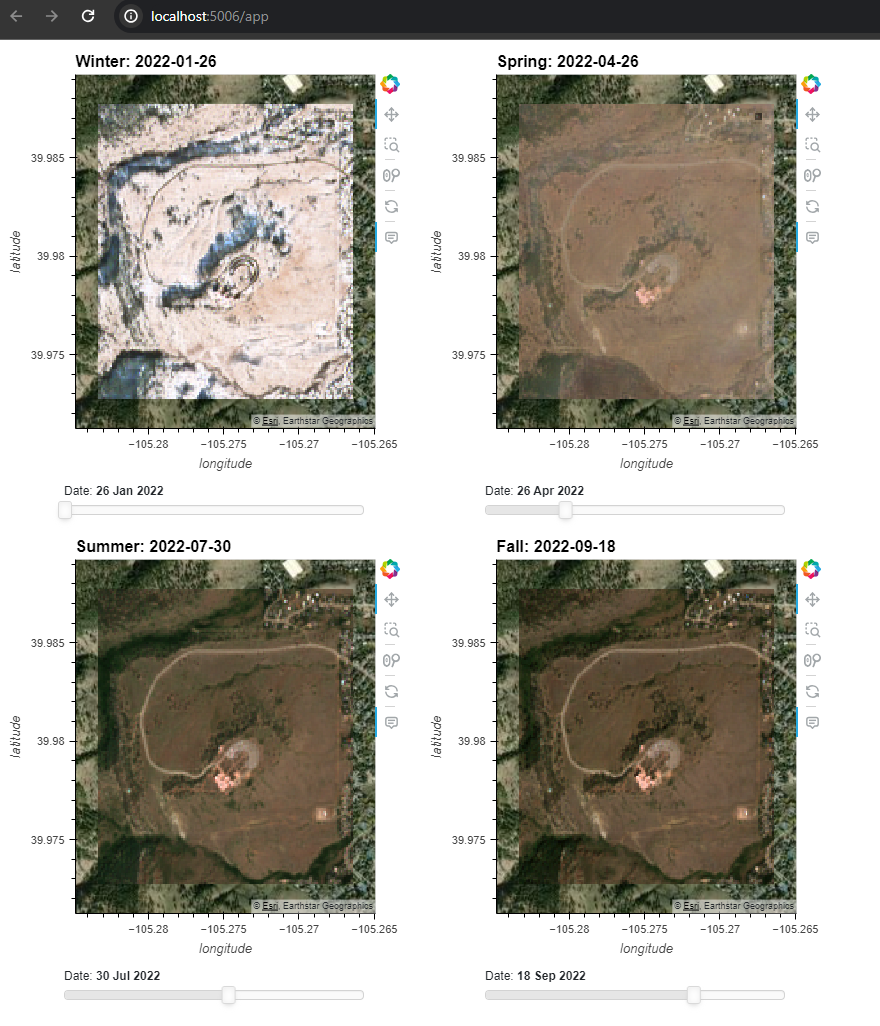

Hold `Ctrl + C` to stop the web server and exit back to the shell.

## Build the application in a container

### Create the container image file

A container image file, popularly referred to as a Dockerfile, is a set of instructions on how to build and run an application. The next step is to create a Containerfile and add in the instructions required. Create a new file named Containerfile in the current working directory in whatever fashion you are most comfortable with. The contents of the Containerfile are shown below with comments inline to explain what each line does. 

```docker
# Use an official Mamba image as the base image
FROM docker.io/mambaorg/micromamba:latest

# Set the user to root for file copies and ownership
USER root

# Set the working directory in the container to /home/mambauser/app
WORKDIR /home/mambauser/app

# Copy the interactive-web-app directory contents into the container at /home/mambauser/app
COPY --chown=mambauser interactive-web-app/app.py interactive-web-app/environment.yml .

# Install any needed packages specified in requirements.yml
# Activate the environment by providing ENV_NAME as an environment variable at runtime 
RUN micromamba env create -f environment.yml

# Make port 5006 available for access outside this container
EXPOSE 5006

# Switch to mambauser for the running image
USER mambauser

# Set the command to run when the container is run
CMD ["panel", "serve", "--port", "5006", "app.py", "--allow-websocket-origin=*"]
```

Copy these instructions in to the Containerfile created above and save it. In total only 8 lines are required to setup what is required to run the application in a container. 

### Build the container image

With the container image build instructions in place a command can now be run to build it. The command below is an example of building an image in the ncote project with the name nbviz2cntnr. When running this command the image tag, `-t`, should be updated to something that makes sense for you. 

`podman build -f Containerfile -t ncote/nbviz2cntnr . --format=docker`

```{note}
With podman you do not need to specify a file name with `-f Containerfile` but that is included in case the file was named something else. By default podman will recognize files named `Dockerfile` or `Containerfile` without having to specify the location. Docker only recognizes `Dockerfile` so if this was built with docker instead of podman the `-f` flag would be required. The flag `--format=docker` is included as some of the lines used in the instructions are not in the OCI format and some shell commands will be ignored without it. 
```

It will take a few minutes for the image to build. When it is complete the output will look something like the following:

```shell
Successfully tagged localhost/ncote/nbviz2cntnr:latest
33df1d75d984069ed2a5200abb27cddd040c14766a221d2c121712df39a7b337
```

### Run the container image locally

Now that the image has been built it can also be ran locally to test functionality. The following command will run the container and make it accessible on the same URL as used before, [http://localhost:5006/app](http://localhost:5006/app).

`podman run -e ENV_NAME=is2-cookbook-dev -p 5006:5006 ncote/nbviz2cntr`

Because the container is built on top of mamba, and a custom conda environment has been installed, it's required to provide the environment name to activate when launching the container image. This is done with the `-e ENV_NAME=is2-cookbook-dev` flag. The port exposed in the container is also mapped to a port on the host machine with `-p 5006:5006`

The site is now accessible at the same URL but is running inside a container. The image that was built can be put in to a container registry. The CISL Cloud Pilot hosts a private registry at [https://hub.k8s.ucar.edu/](https://hub.k8s.ucar.edu/) and provides instructions that can be found at this [link to container registry documentation](https://ncar.github.io/cisl-cloud/how-to/K8s/harbor/harbor-intro.html).